In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import get_upa_data, upa_formatter_500

from datetime import datetime

from metpy.plots import PlotObs, MapPanel, PanelContainer
from metpy.units import units

In [2]:
plot_time = datetime(2003, 2, 10, 0)
upa_obs = get_upa_data(plot_time)

# Just like before, let's explore the data a bit
upa_obs

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind,latitude,longitude
0,954.0,386.0,-25.3,-30.3,350.0,14.0,CWPL,2003-02-10,2.431074,-13.787309,51.47,-90.2
1,925.0,607.0,-27.3,-30.8,345.0,20.0,CWPL,2003-02-10,5.176381,-19.318517,51.47,-90.2
2,924.7,609.0,NaN,NaN,345.0,20.0,CWPL,2003-02-10,5.176381,-19.318517,51.47,-90.2
3,886.0,914.0,NaN,NaN,335.0,21.0,CWPL,2003-02-10,8.874983,-19.032464,51.47,-90.2
4,850.0,1209.0,-32.9,-36.0,320.0,23.0,CWPL,2003-02-10,14.784115,-17.619022,51.47,-90.2
...,...,...,...,...,...,...,...,...,...,...,...,...
9026,5.7,34299.0,-56.9,-88.9,NaN,NaN,KYXY,2003-02-10,NaN,NaN,NaN,NaN
9027,5.6,34442.0,NaN,NaN,345.0,16.0,KYXY,2003-02-10,4.141105,-15.454813,NaN,NaN
9028,5.0,35140.0,-56.7,-88.7,15.0,21.0,KYXY,2003-02-10,-5.435200,-20.284442,NaN,NaN
9029,4.8,35356.0,NaN,NaN,30.0,14.0,KYXY,2003-02-10,-7.000000,-12.124356,NaN,NaN


In [3]:
# This time, compute a diagnostic before creating the plot
upa_obs['dewpoint_depression'] = upa_obs['temperature'] - upa_obs['dewpoint']

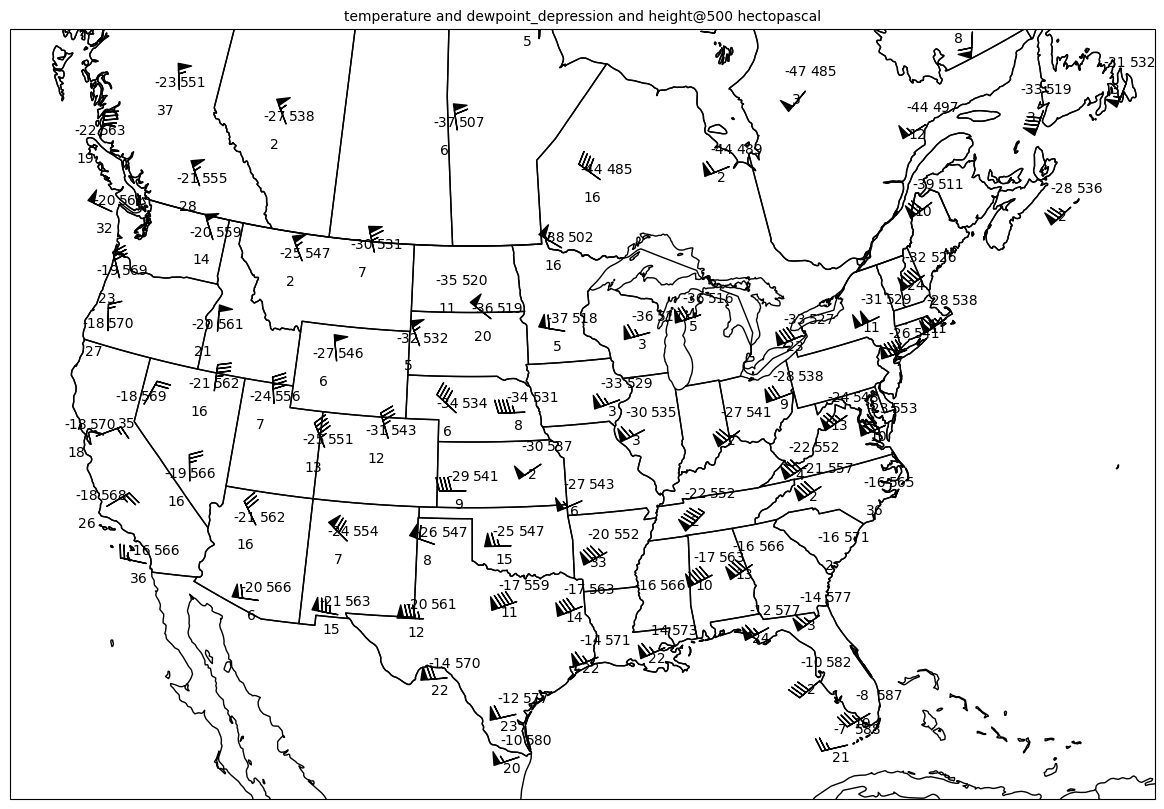

In [4]:
obs = PlotObs()
obs.data = upa_obs
obs.time = plot_time
obs.level = 500 * units.hPa
obs.fields = ['temperature', 'dewpoint_depression', 'height']
obs.locations = ['NW', 'SW', 'NE']
obs.formats = [None, None, upa_formatter_500]
obs.vector_field = ('u_wind', 'v_wind')
obs.reduce_points = 0

panel = MapPanel()
panel.projection = 'lcc'
panel.area = (-122,-67,24,55)
panel.layers = ['coastline','borders','states']
panel.plots = [obs]

pc = PanelContainer()
pc.size = (15, 10)
pc.panels = [panel]

pc.show()